In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

path="/Users/majiefeng/Desktop/研究生课程/数据挖掘/homework_jfma/个贷违约预测/"
test_data = pd.read_csv(path+"test_public.csv")
train_public_data = pd.read_csv(path+"train_dataset/train_public.csv")
train_internet_data = pd.read_csv(path+"train_dataset/train_internet.csv")

In [3]:
test_data.info() # 查看基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   5000 non-null   int64  
 1   user_id                   5000 non-null   int64  
 2   total_loan                5000 non-null   float64
 3   year_of_loan              5000 non-null   int64  
 4   interest                  5000 non-null   float64
 5   monthly_payment           5000 non-null   float64
 6   class                     5000 non-null   object 
 7   employer_type             5000 non-null   object 
 8   industry                  5000 non-null   object 
 9   work_year                 4722 non-null   object 
 10  house_exist               5000 non-null   int64  
 11  censor_status             5000 non-null   int64  
 12  issue_date                5000 non-null   object 
 13  use                       5000 non-null   int64  
 14  post_cod

In [4]:
train_public_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   10000 non-null  int64  
 1   user_id                   10000 non-null  int64  
 2   total_loan                10000 non-null  float64
 3   year_of_loan              10000 non-null  int64  
 4   interest                  10000 non-null  float64
 5   monthly_payment           10000 non-null  float64
 6   class                     10000 non-null  object 
 7   employer_type             10000 non-null  object 
 8   industry                  10000 non-null  object 
 9   work_year                 9378 non-null   object 
 10  house_exist               10000 non-null  int64  
 11  censor_status             10000 non-null  int64  
 12  issue_date                10000 non-null  object 
 13  use                       10000 non-null  int64  
 14  post_co

In [5]:
train_internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   750000 non-null  int64  
 1   user_id                   750000 non-null  int64  
 2   total_loan                750000 non-null  float64
 3   year_of_loan              750000 non-null  int64  
 4   interest                  750000 non-null  float64
 5   monthly_payment           750000 non-null  float64
 6   class                     750000 non-null  object 
 7   sub_class                 750000 non-null  object 
 8   work_type                 750000 non-null  object 
 9   employer_type             750000 non-null  object 
 10  industry                  750000 non-null  object 
 11  work_year                 706153 non-null  object 
 12  house_exist               750000 non-null  int64  
 13  house_loan_status         750000 non-null  i

In [8]:
# 找出两项训练集间的异同
common_cols = []
for col in train_internet_data.columns:
    if col in train_public_data.columns:
        common_cols.append(col)
    else: continue

train_public_left = list(set(list(train_public_data.columns)) - set(common_cols))
train_internet_left = list(set(list(train_internet_data.columns)) - set(common_cols))

print(common_cols)
print(train_public_left)
print(train_internet_left)

['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'class', 'employer_type', 'industry', 'work_year', 'house_exist', 'censor_status', 'issue_date', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'pub_dero_bankrup', 'early_return', 'early_return_amount', 'early_return_amount_3mon', 'recircle_b', 'recircle_u', 'initial_list_status', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1', 'f2', 'f3', 'f4', 'is_default']
['app_type', 'known_outstanding_loan', 'known_dero']
['work_type', 'sub_class', 'f5', 'house_loan_status', 'offsprings', 'marriage']


In [9]:
# 找出public训练集和public测试集间的异同
common_cols = []
for col in test_data.columns:
    if col in train_public_data.columns:
        common_cols.append(col)
    else: continue

train_public_left = list(set(list(train_public_data.columns)) - set(common_cols))
test_left = list(set(list(test_data.columns)) - set(common_cols))

print(common_cols)
print(train_public_left)
print(test_left)

['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'class', 'employer_type', 'industry', 'work_year', 'house_exist', 'censor_status', 'issue_date', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return', 'early_return_amount', 'early_return_amount_3mon']
['is_default']
[]


In [16]:
import re

def workYearDIc(x):
    if str(x)=='nan':
        return -1
    x = x.replace('< 1','0')
    temp = int(re.search('(\d+)', x).group())
    return temp

def findDig(val):
    fd = re.search('(\d+-)', val)
    if fd is None: # no match, month-year format
        return '01-'+val
    # matched, year-month format
    year, month = val.split("-")[0], val.split("-")[1]
    return '01-'+month+"-"+year


class_dict = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
}
timeMax = pd.to_datetime('1-Dec-21')
train_public_data['work_year'] = train_public_data['work_year'].map(workYearDIc)
test_data['work_year'] = test_data['work_year'].map(workYearDIc)
train_public_data['class'] = train_public_data['class'].map(class_dict)
test_data['class'] = test_data['class'].map(class_dict)

train_public_data['earlies_credit_mon'] = pd.to_datetime(train_public_data['earlies_credit_mon'].map(findDig), dayfirst = True)
test_data['earlies_credit_mon'] = pd.to_datetime(test_data['earlies_credit_mon'].map(findDig), dayfirst = True)
train_public_data.loc[ train_public_data['earlies_credit_mon']>timeMax,'earlies_credit_mon' ] = train_public_data.loc[ train_public_data['earlies_credit_mon']>timeMax,'earlies_credit_mon' ]+  pd.offsets.DateOffset(years=-100)  
test_data.loc[ test_data['earlies_credit_mon']>timeMax,'earlies_credit_mon' ] = test_data.loc[ test_data['earlies_credit_mon']>timeMax,'earlies_credit_mon' ]+ pd.offsets.DateOffset(years=-100)
train_public_data['issue_date'] = pd.to_datetime(train_public_data['issue_date'])
test_data['issue_date'] = pd.to_datetime(test_data['issue_date'])

train_public_data['issue_date_month'] = train_public_data['issue_date'].dt.month
test_data['issue_date_month'] = test_data['issue_date'].dt.month
train_public_data['issue_date_dayofweek'] = train_public_data['issue_date'].dt.dayofweek
test_data['issue_date_dayofweek'] = test_data['issue_date'].dt.dayofweek

train_public_data['earliesCreditMon'] = train_public_data['earlies_credit_mon'].dt.month
test_data['earliesCreditMon'] = test_data['earlies_credit_mon'].dt.month
train_public_data['earliesCreditYear'] = train_public_data['earlies_credit_mon'].dt.year
test_data['earliesCreditYear'] = test_data['earlies_credit_mon'].dt.year

###internet数据
train_internet_data['work_year'] = train_internet_data['work_year'].map(workYearDIc)
train_internet_data['class'] = train_internet_data['class'].map(class_dict)
train_internet_data['earlies_credit_mon'] = pd.to_datetime(train_internet_data['earlies_credit_mon'])
train_internet_data['issue_date'] = pd.to_datetime(train_internet_data['issue_date'])
train_internet_data['issue_date_month'] = train_internet_data['issue_date'].dt.month
train_internet_data['issue_date_dayofweek'] = train_internet_data['issue_date'].dt.dayofweek
train_internet_data['earliesCreditMon'] = train_internet_data['earlies_credit_mon'].dt.month
train_internet_data['earliesCreditYear'] = train_internet_data['earlies_credit_mon'].dt.year

# diff_date
base_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
# 转换为天为单位
train_public_data['issue_date_diff'] = train_public_data['issue_date'].apply(lambda x: x-base_time).dt.days
# 设置初始的时间
base_time = datetime.datetime.strptime('1952-06-01', '%Y-%m-%d')
# 转换为天为单位
train_public_data['earlies_credit_mon_diff'] = train_public_data['earlies_credit_mon'].apply(lambda x: x-base_time).dt.days
train_public_data['issue_earlies_diff'] = (train_public_data['issue_date'] - train_public_data['earlies_credit_mon']).dt.days

# 最小日期为 1959-06-01, 最大日期为 2014-11-01
# 设置初始的时间
base_time = datetime.datetime.strptime('1952-06-01', '%Y-%m-%d')
# 转换为天为单位
test_data['earlies_credit_mon_diff'] = test_data['earlies_credit_mon'].apply(lambda x: x-base_time).dt.days
test_data['issue_earlies_diff'] = (test_data['issue_date'] - test_data['earlies_credit_mon']).dt.days

employer_type = train_public_data['employer_type'].value_counts().index
industry = train_public_data['industry'].value_counts().index
# 标签编码
emp_type_dict = dict(zip(employer_type, [i for i in range(len(employer_type))]))
industry_dict = dict(zip(industry, [i for i in range(len(industry))]))

train_public_data['employer_type'] = train_public_data['employer_type'].map(emp_type_dict)
train_public_data['industry'] = train_public_data['industry'].map(industry_dict)
train_internet_data['employer_type'] = train_internet_data['employer_type'].map(emp_type_dict)
train_internet_data['industry'] = train_internet_data['industry'].map(industry_dict)
test_data['employer_type'] = test_data['employer_type'].map(emp_type_dict)
test_data['industry'] = test_data['industry'].map(industry_dict)

变量issue_date不是数值型变量
变量earlies_credit_mon不是数值型变量


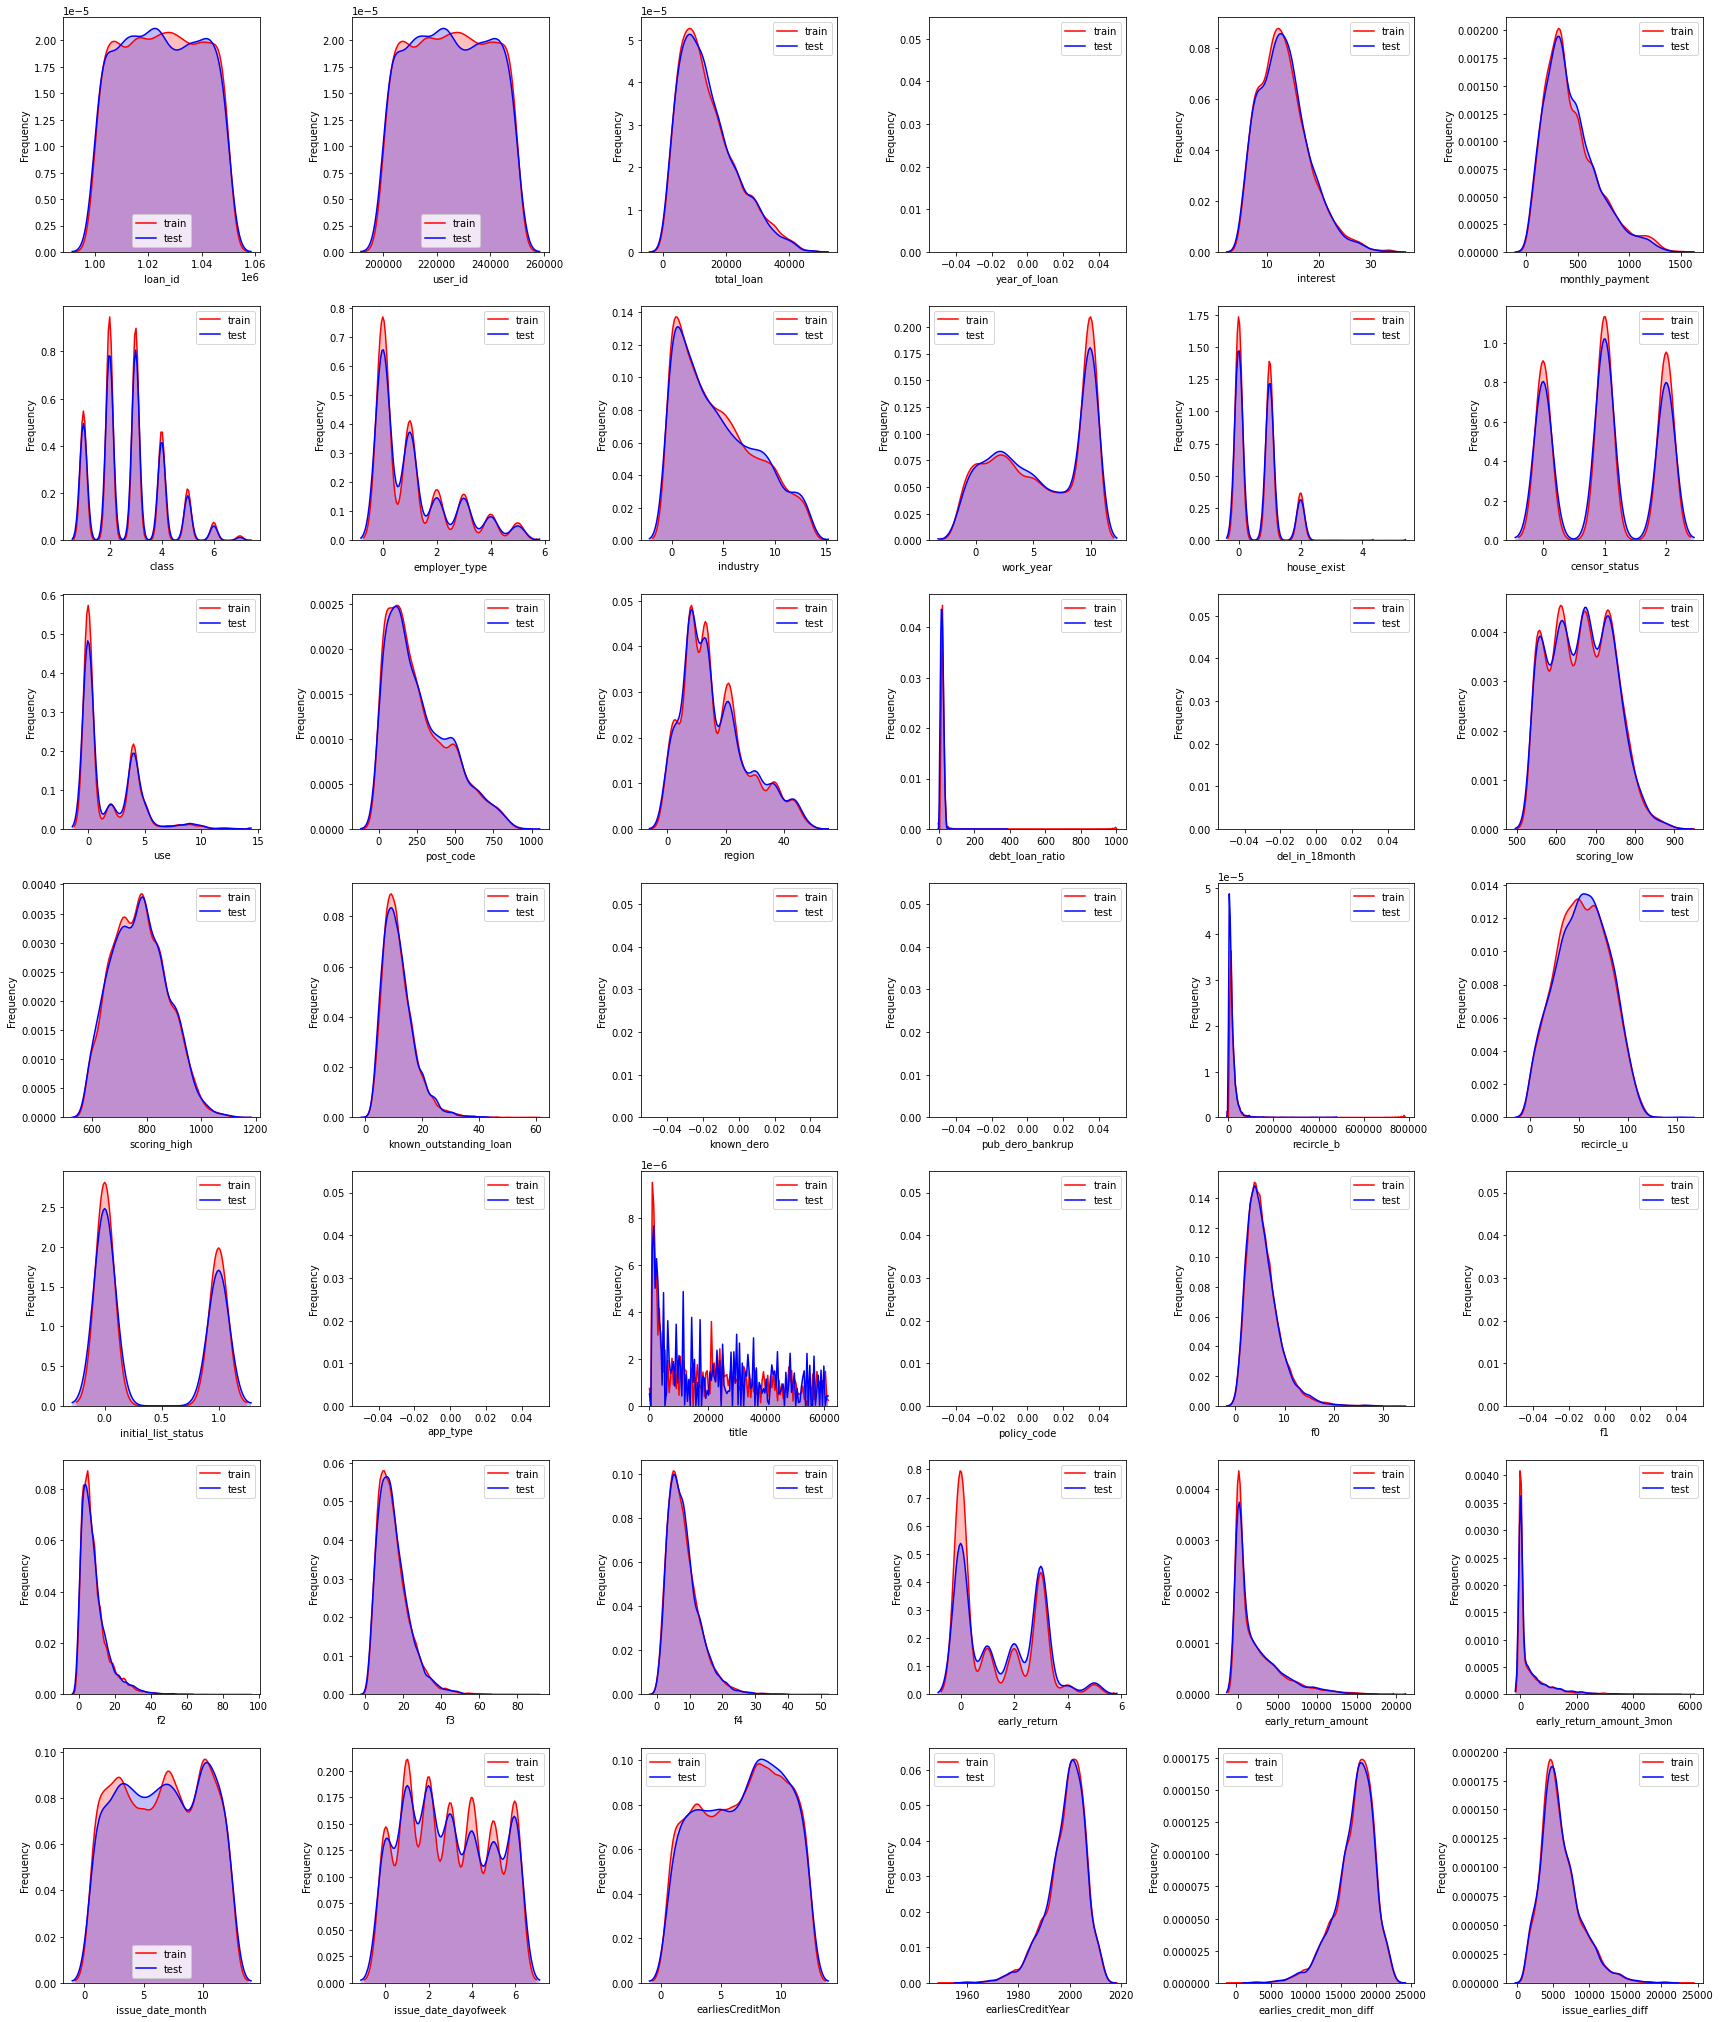

In [17]:
# KDE 分布图
common_cols = []
for col in test_data.columns:
    if col in train_public_data.columns:
        common_cols.append(col)
    else: continue

dist_cols = 6
dist_rows = len(common_cols)
plt.figure(figsize=(4*dist_cols, 4*dist_rows))
i = 1

for col in common_cols:
    try:
        ax = plt.subplot(dist_rows, dist_cols, i)
        ax = sns.kdeplot(train_public_data[col], color = 'Red', shade=True)
        ax = sns.kdeplot(test_data[col], color = 'Blue', shade=True)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax = ax.legend(['train','test'])
        i += 1
    except:
        print(f'变量{col}不是数值型变量')
plt.tight_layout()
plt.show()

变量issue_date不是数值型变量
变量earlies_credit_mon不是数值型变量


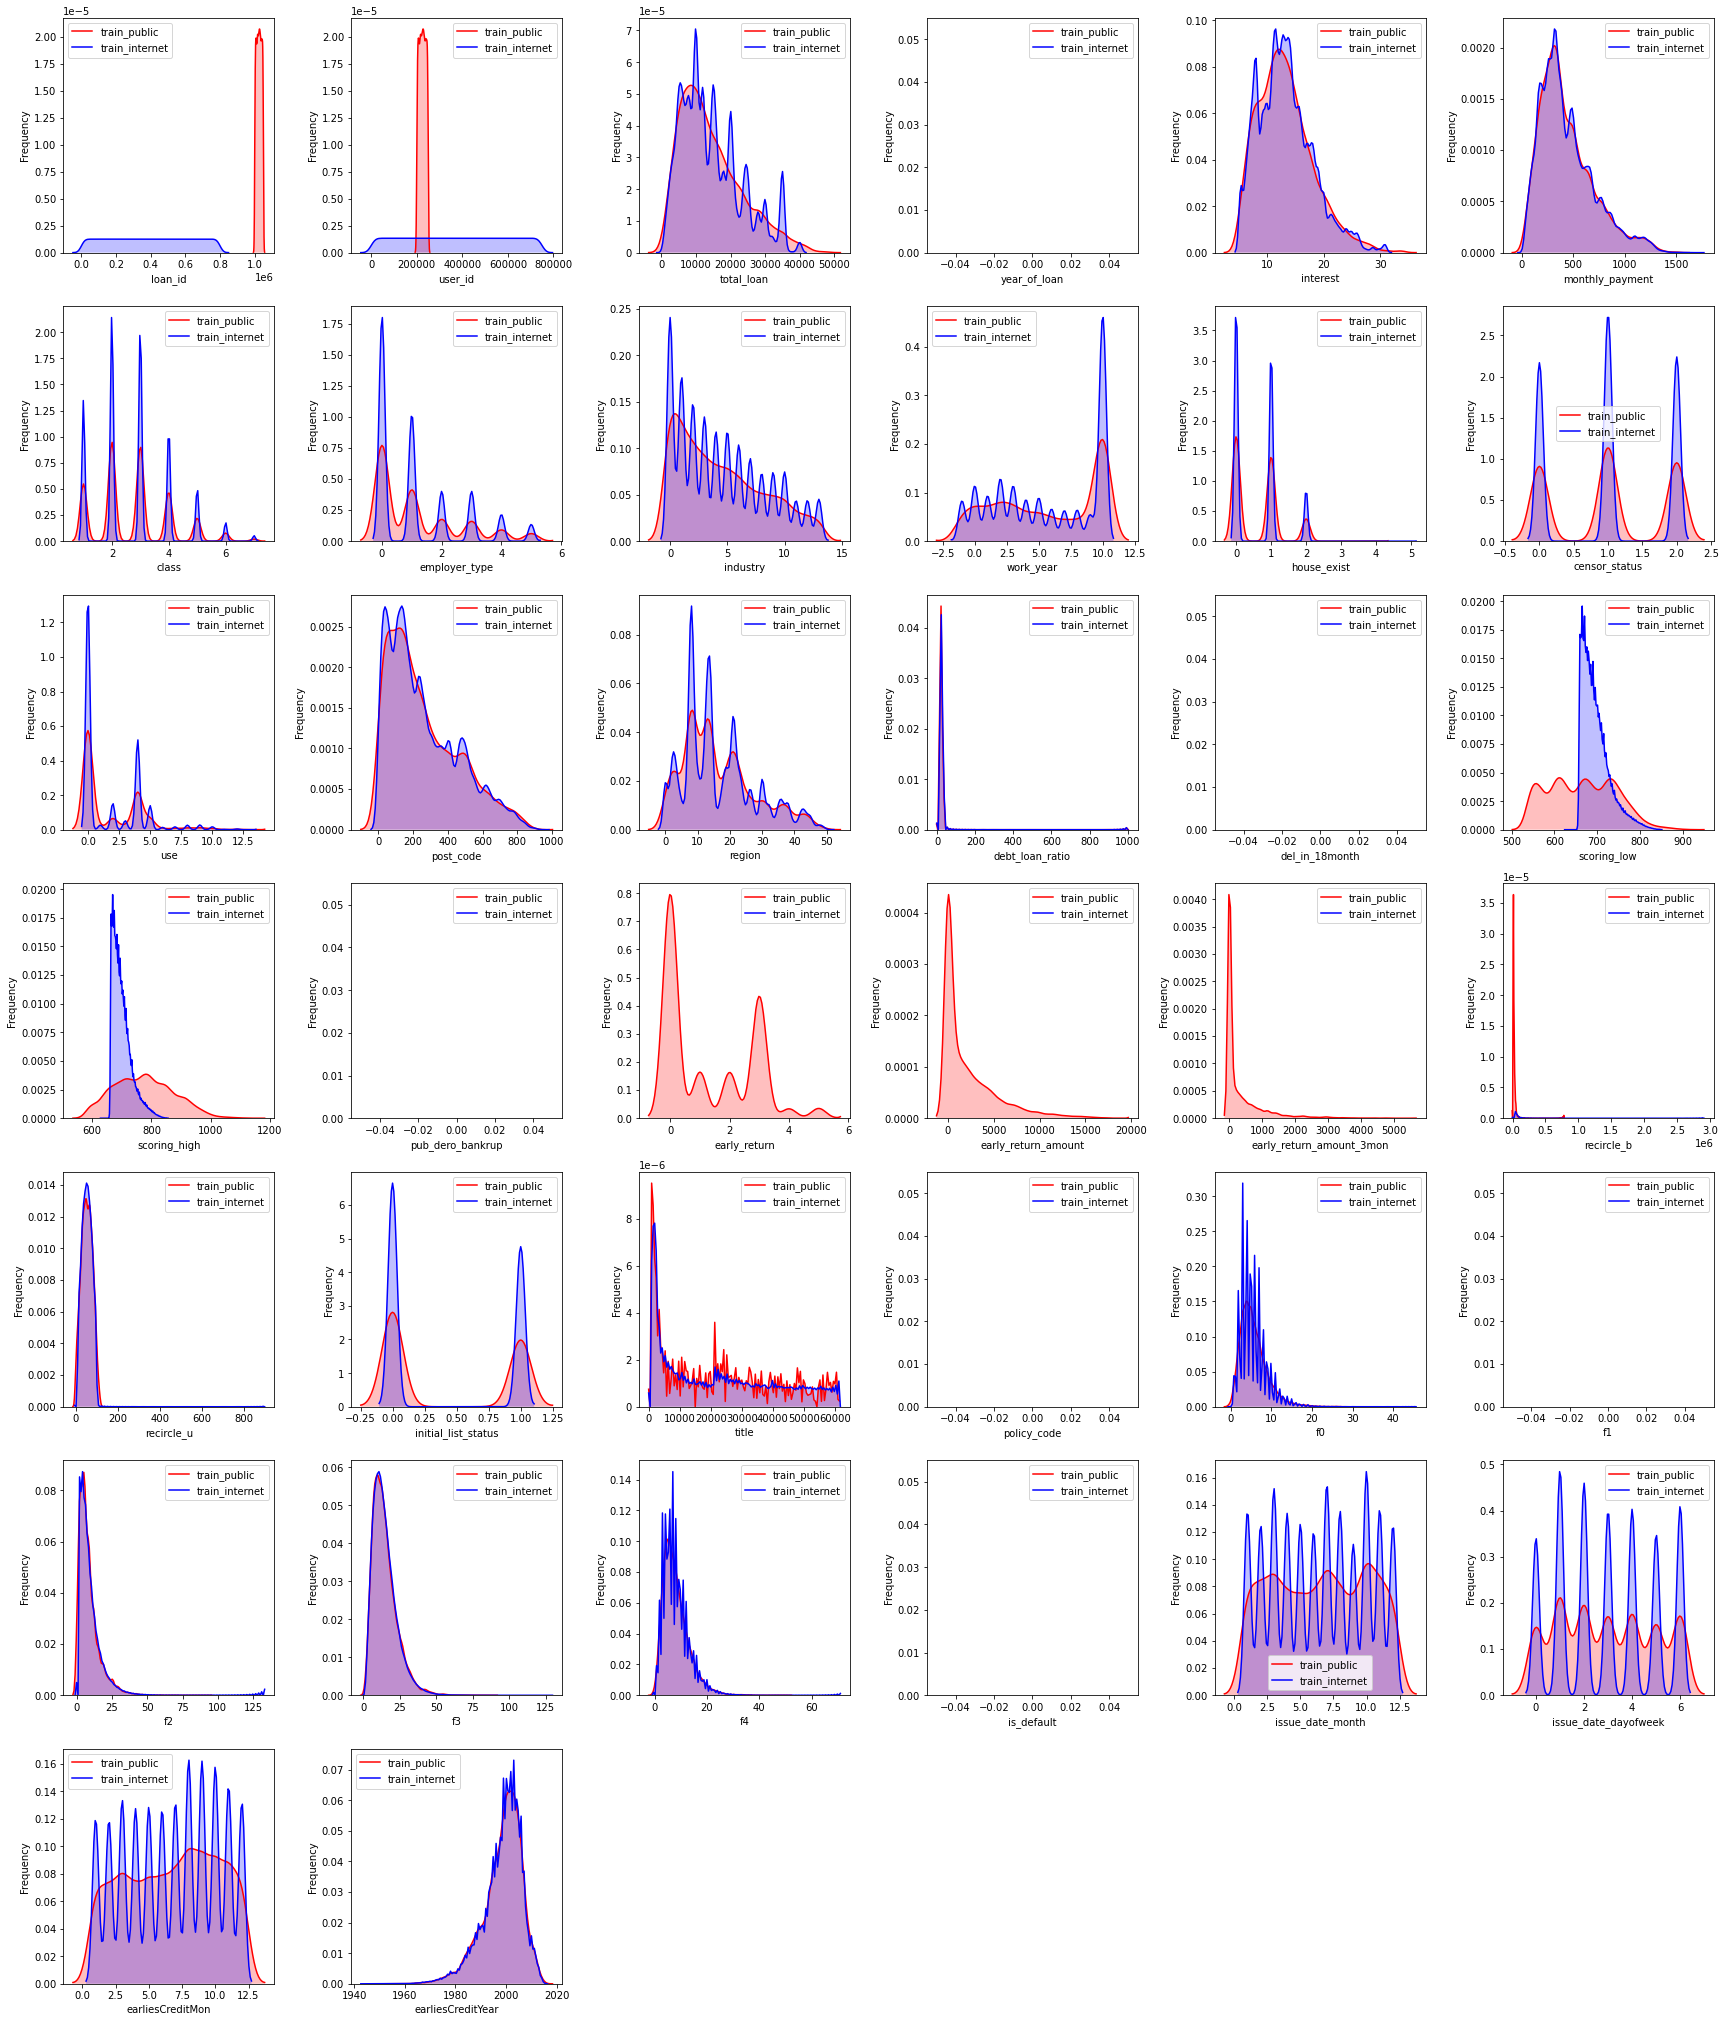

In [18]:
# KDE 分布图
common_cols = []
for col in train_internet_data.columns:
    if col in train_public_data.columns:
        common_cols.append(col)
    else: continue

dist_cols = 6
dist_rows = len(common_cols)
plt.figure(figsize=(4*dist_cols, 4*dist_rows))
i = 1

for col in common_cols:
    try:
        ax = plt.subplot(dist_rows, dist_cols, i)
        ax = sns.kdeplot(train_public_data[col], color = 'Red', shade=True)
        ax = sns.kdeplot(train_internet_data[col], color = 'Blue', shade=True)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax = ax.legend(['train_public','train_internet'])
        i += 1
    except:
        print(f'变量{col}不是数值型变量')
plt.tight_layout()
plt.show()